<a href="https://colab.research.google.com/github/Priyabrat845/Credit-Card-Default-Prediction-/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
pip install shap

     |████████████████████████████████| 358kB 7.7MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491625 sha256=e56db9e1292fe46f469a61da46e020e196d68f7302cce75273be1499f30dc846
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Importing all the libarary
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  roc_auc_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly.express as px
import shap
import warnings
warnings.filterwarnings('ignore')

## **Importing Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset1=pd.read_excel('/content/drive/MyDrive/Almabetter/default of credit card clients.xls')
dataset1.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [ ]:
dataset=pd.read_excel('/content/drive/MyDrive/Almabetter/default of credit card clients.xls',header=1)
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
dataset.rename(columns={'default payment next month':'Default payment'},inplace=True)
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
dataset.shape

(30000, 25)

This dataset contains 25 features and 30000 observations.

In [ ]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default payment'],
      dtype='object')

## **Exploratory Data Analysis**

In [ ]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               30000 non-null  int64
 1   LIMIT_BAL        30000 non-null  int64
 2   SEX              30000 non-null  int64
 3   EDUCATION        30000 non-null  int64
 4   MARRIAGE         30000 non-null  int64
 5   AGE              30000 non-null  int64
 6   PAY_0            30000 non-null  int64
 7   PAY_2            30000 non-null  int64
 8   PAY_3            30000 non-null  int64
 9   PAY_4            30000 non-null  int64
 10  PAY_5            30000 non-null  int64
 11  PAY_6            30000 non-null  int64
 12  BILL_AMT1        30000 non-null  int64
 13  BILL_AMT2        30000 non-null  int64
 14  BILL_AMT3        30000 non-null  int64
 15  BILL_AMT4        30000 non-null  int64
 16  BILL_AMT5        30000 non-null  int64
 17  BILL_AMT6        30000 non-null  int64
 18  PAY_AM

In [ ]:
dataset.isna().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
Default payment    0
dtype: int64

From the above we can see that there is no NULL values to remove.

In [ ]:
dataset['Default payment'].value_counts()

0    23364
1     6636
Name: Default payment, dtype: int64

The dataset contains a very less amount of default payment observations as compared to the non-default payment observations. 

In [ ]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
dataset['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Text(0.5, 1.0, 'Conunts of different sex')

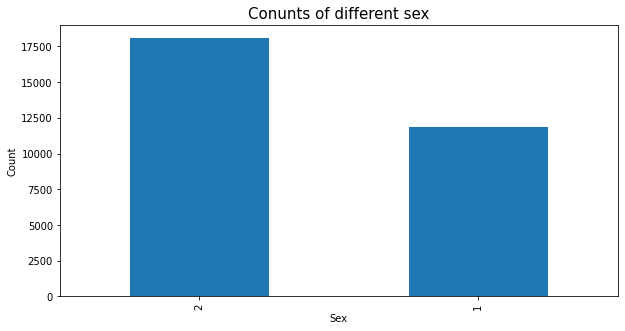

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
dataset['SEX'].value_counts().plot.bar()
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Conunts of different sex',Size=15)

In [ ]:
# Replacing the sex groups to reduce bias or data insufficiency.
dataset['SEX']= dataset['SEX'].replace({1:0,2:1})
dataset['SEX'].value_counts()

1    18112
0    11888
Name: SEX, dtype: int64

Text(0.5, 1.0, 'Conunts of different sex')

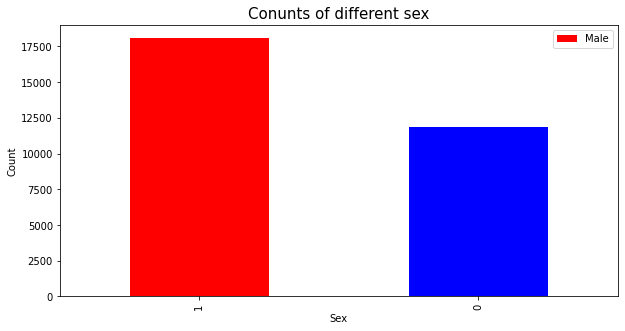

In [ ]:
dataset['SEX'].value_counts().plot.bar(color=['red','blue'])
Gender=["Male","Female"]
plt.legend(Gender)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Conunts of different sex',Size=15)

In [ ]:
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, 'Conunts of different marriage groups')

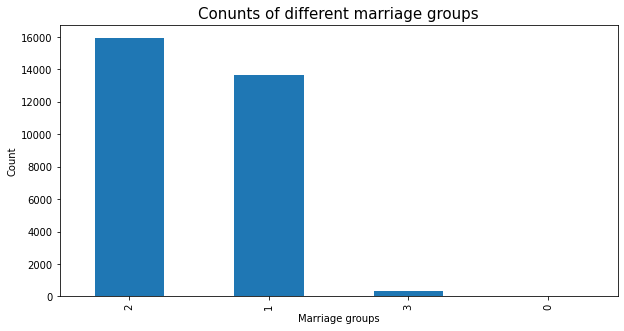

In [ ]:
dataset['MARRIAGE'].value_counts().plot.bar()
plt.xlabel('Marriage groups')
plt.ylabel('Count')
plt.title('Conunts of different marriage groups',Size=15)

From the above graph we can see that, most of the customers that the dataset contains are married.

In [ ]:
dataset['AGE'].value_counts().sort_index()

21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: AGE, dtype: int64

As more than 1000 users belong to the 21-23 age range, so we are considering them as unmarried for the sake of simplicity.

In [ ]:
# Replacing the different Marriage groups to reduce bias or data insufficiency.
dataset['MARRIAGE']= dataset['MARRIAGE'].replace({3:1,2:1,1:0})
dataset['MARRIAGE'].value_counts()

1    16287
0    13713
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, 'Conunts of different marriage groups')

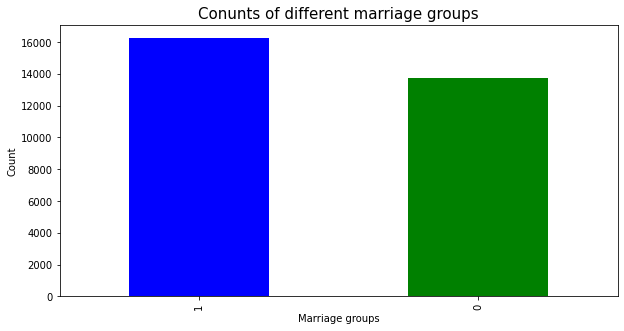

In [ ]:
dataset['MARRIAGE'].value_counts().plot.bar(color=['blue','green'])
plt.xlabel('Marriage groups')
plt.ylabel('Count')
plt.title('Conunts of different marriage groups',Size=15)

In [ ]:
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
#Education (0 = graduate school; 1 = university; 2 = high school).
## Replacing the different Educational groups to reduce bias or data insufficiency.
dataset['EDUCATION']= dataset['EDUCATION'].replace({1:0,2:1,3:2,4:2,5:2,6:2})
dataset['EDUCATION'].value_counts()

1    14030
0    10599
2     5371
Name: EDUCATION, dtype: int64

Text(0.5, 1.0, 'Conunts of different Educational groups')

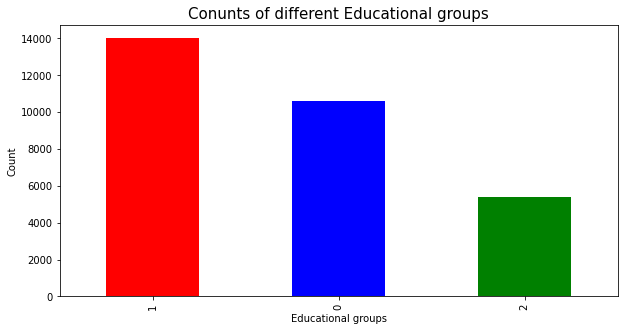

In [ ]:
dataset['EDUCATION'].value_counts().plot.bar(color=['red','blue','green'])
plt.xlabel('Educational groups')
plt.ylabel('Count')
plt.title('Conunts of different Educational groups',Size=15)

In [ ]:
dataset['Default payment'].value_counts()

0    23364
1     6636
Name: Default payment, dtype: int64

The dataset contains a few observations for the default payment as compared to the non-default payment.

Text(0.5, 1.0, 'Conunts of different payment groups')

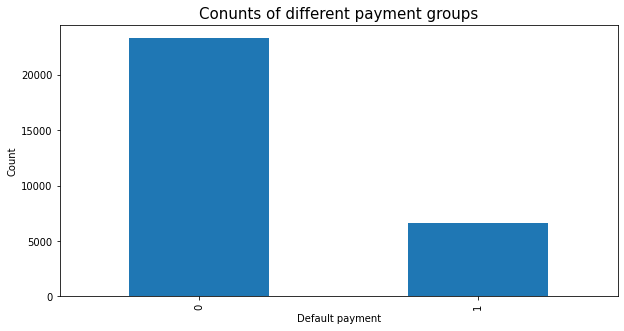

In [ ]:
dataset['Default payment'].value_counts().plot.bar()
plt.xlabel('Default payment')
plt.ylabel('Count')
plt.title('Conunts of different payment groups',Size=15)

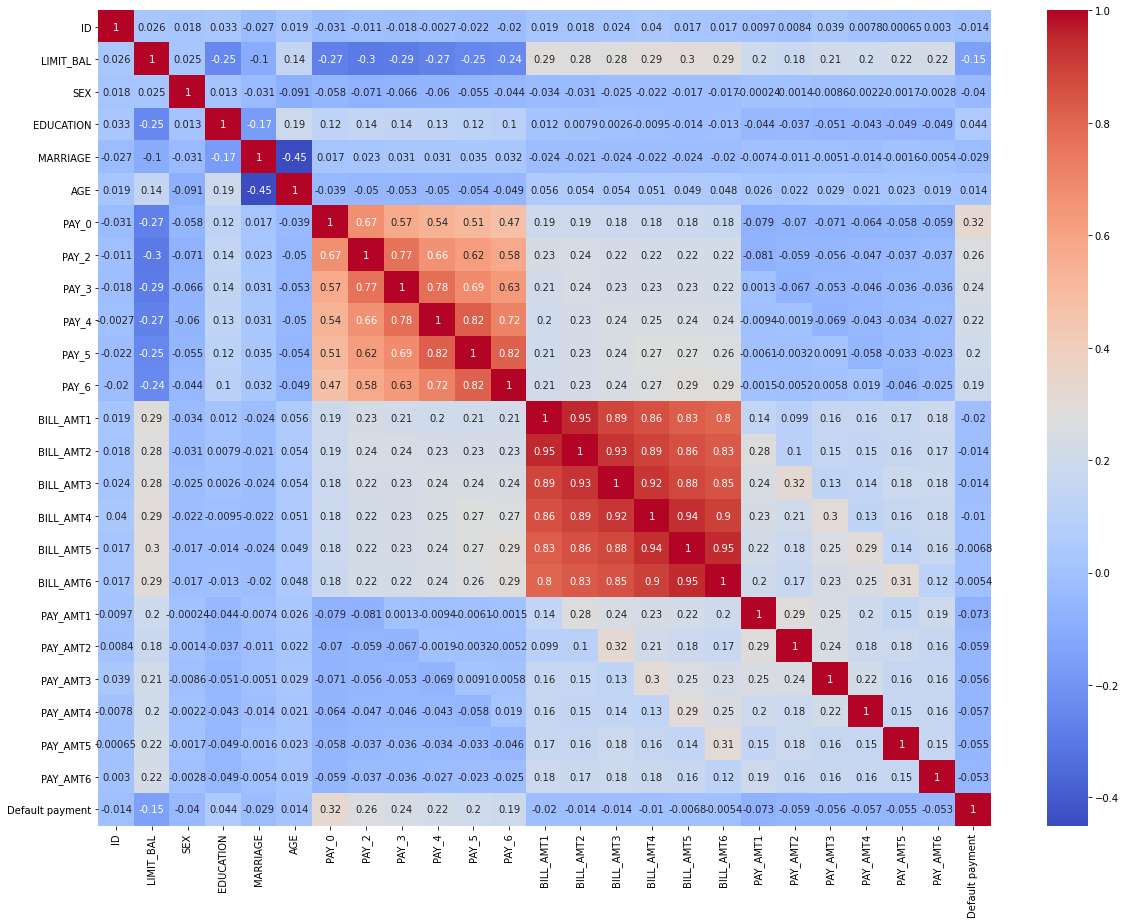

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True,cmap="coolwarm")

From the above Heatmap we can see that, featurers like previous month payment & bill amount are highly correlated. 

In [ ]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment
0,1,20000,1,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,1,2,1,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,1,2,1,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
# Deriving a new feature "Pending bill" to know more about the total amount of pending bills for different users.
dataset['Pending bill']=(dataset['BILL_AMT1']+dataset['BILL_AMT2']+dataset['BILL_AMT3']+dataset['BILL_AMT4']+dataset['BILL_AMT5']+dataset['BILL_AMT6'])-\
                        (dataset['PAY_AMT1']+dataset['PAY_AMT1']+dataset['PAY_AMT1']+dataset['PAY_AMT1']+dataset['PAY_AMT1']+dataset['PAY_AMT1'])
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment,Pending bill
0,1,20000,1,1,0,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,1,1,1,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,1,1,1,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,92545


In [ ]:
dataset.groupby('Default payment')['Pending bill'].sum()

Default payment
0    5480841223
1    1595564423
Name: Pending bill, dtype: int64

In [ ]:
dataset['Pending bill'].mean()

235880.1882

In [ ]:
dataset.groupby('AGE')['Pending bill']

AGE
21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: Pending bill, dtype: int64

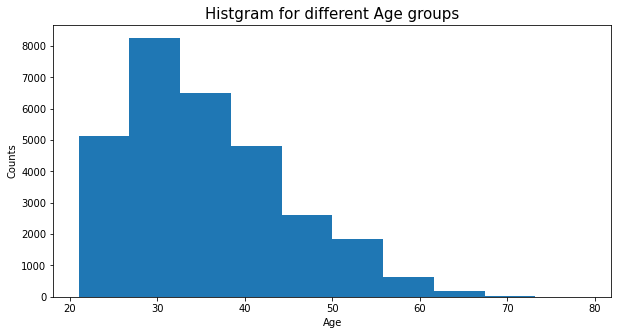

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
ax = plt.subplot(111)
ax.hist(dataset['AGE'])
ax.set_title("Histgram for different Age groups",size=15)
ax.set_xlabel('Age')
ax.set_ylabel('Counts')
plt.show()

Text(0.5, 1.0, 'Age for not default Next Month')

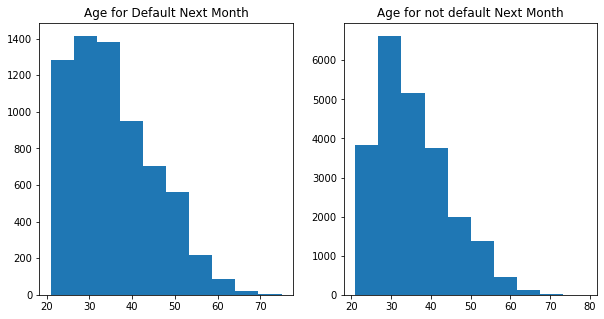

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
Default = dataset[dataset['Default payment']==1]
Not_default = dataset[dataset['Default payment']==0]
fig,axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(Default['AGE'])
axes[0].set_title("Age for Default Next Month")
axes[1].hist(Not_default['AGE'])
axes[1].set_title("Age for not default Next Month")


In [ ]:
# Adding a new age column that divide the age (21 to 79) into 6 sections
def get_age_range(age):
    j = 20
    for i in range(6):
        if age < j+10:
            break
        j = j + 10
    return j    

In [ ]:
age_range_df=pd.DataFrame(columns=['Age_range','Default payment'])

In [ ]:
age_range_df['Age_range']=dataset['AGE'].apply(lambda x:get_age_range(x))

In [ ]:
age_range_df['Default payment']=dataset['Default payment']

In [ ]:
age_range_df.head(3)

,Age_range,Default payment
0,20,1
1,20,1
2,30,0


Text(0.5, 1.0, 'Age groups VS Default payment graph')

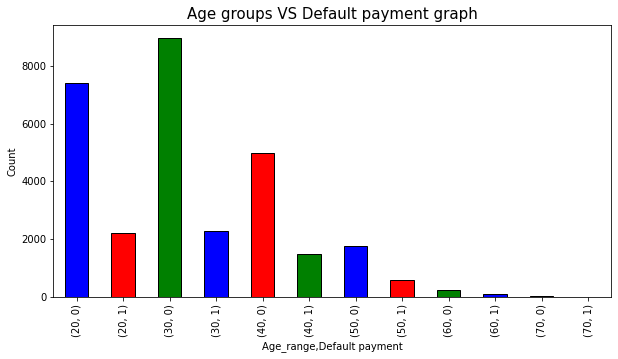

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
age_range_df.groupby('Age_range')['Default payment'].value_counts().plot.bar(edgecolor='black',color=['blue','red','green'])
plt.ylabel('Count')
plt.title('Age groups VS Default payment graph',Size=15)

From the above graph we can see that, the 20-30 age range are the most default one as compared to the other age groups.

Text(0, 0.5, 'Deault count')

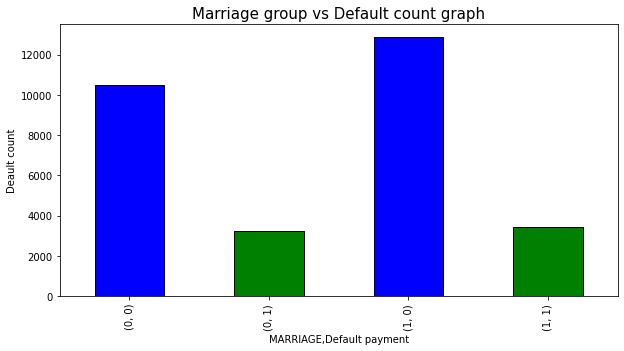

In [ ]:
ax=dataset.groupby('MARRIAGE')['Default payment'].value_counts().plot.bar(edgecolor='black',color=['blue','green'])
ax.set_title('Marriage group vs Default count graph',size=15)
plt.ylabel('Deault count')

Approx 3000+ unmarriaed and marriaed users are the defaulters.

In [ ]:
#marriage_group = dataset.groupby(['MARRIAGE','Default payment'])
#marriage_group.size().unstack().plot(kind='bar')
#plt.show()

Text(0, 0.5, 'Deault count')

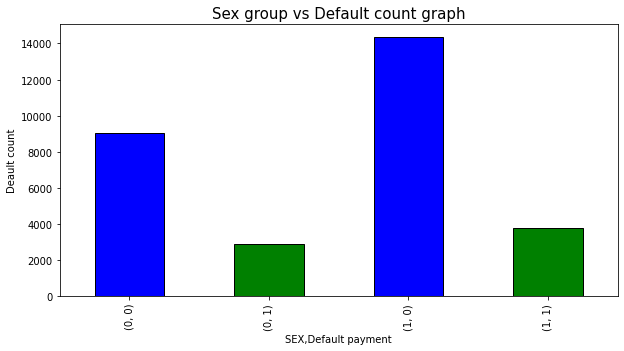

In [ ]:
ax=dataset.groupby('SEX')['Default payment'].value_counts().plot.bar(edgecolor='black',color=['blue','green'])
ax.set_title('Sex group vs Default count graph',size=15)
plt.ylabel('Deault count')

From the above graph we can see that,

In [ ]:
#Removing the unwanted columns.
dataset=dataset.drop(['ID'],axis=1)
dataset.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment
0,20000,1,1,0,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,1,1,1,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,1,1,1,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


## **Machine Learning Model**

In [ ]:
x=dataset.drop('Default payment',axis=1)
y=dataset['Default payment']
x.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,1,1,0,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,1,1,1,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,1,1,1,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000


In [ ]:
# Let's do the training & testing split of our dataset.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print('Shape of x training dataset:',x_train.shape)
print('Shape of x testing dataset:',x_test.shape)
print('Shape of y training dataset:',y_train.shape)
print('Shape of y testing dataset:',y_test.shape)

Shape of x training dataset: (22500, 23)
Shape of x testing dataset: (7500, 23)
Shape of y training dataset: (22500,)
Shape of y testing dataset: (7500,)


## **Logistic Regression Model**

In [ ]:
lg=LogisticRegression(max_iter=10000)
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(classification_report(y_train,lg.predict(x_train)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     17491
           1       0.00      0.00      0.00      5009

    accuracy                           0.78     22500
   macro avg       0.39      0.50      0.44     22500
weighted avg       0.60      0.78      0.68     22500



From the above, we can see that the F1 socre of Logistic Regression on the train dataset is 0.87 which is considerable.

In [ ]:
y_pred_train=lg.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.7772888888888889

In [ ]:
y_pred_test=lg.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.7830666666666667

From the above we can see that. The accuracy of the Logistic Regression model is not upto mark.

## **Decision Tree**

In [ ]:
dt= DecisionTreeClassifier(class_weight="balanced")
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
accuracy_score(y_test,dt.predict(x_test))

0.7386666666666667

From the above we can see that, the accuracy of the **Decision Tree** model is close to **Logistic Regression** model.

## **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
# we can add class_weight='balanced' to add penalize
svc_model = SVC(class_weight='balanced', probability=True)
svc_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_predict_train = svc_model.predict(x_train)
print('Accuracy score:',accuracy_score(y_train, svc_predict_train))

Accuracy score: 0.5822222222222222


In [ ]:
svc_predict = svc_model.predict(x_test)
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))

ROCAUC score: 0.6102358035077863
Accuracy score: 0.582


The socre of **Support Vector Machine** on train & test dataset is only **0.58** which is very low as compared to the **Decision Tree** & **Logistic Regression** Model.

## **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gboost = GradientBoostingClassifier()
gboost.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
accuracy_score(y_train,gboost.predict(x_train))

0.8263111111111111

In [ ]:
accuracy_score(y_test,gboost.predict(x_test))

0.8198666666666666

In [ ]:
from sklearn.model_selection import GridSearchCV

#number of trees
n_estimators = [100,120]

#Maximum depth of tree
max_depth = [6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}


In [ ]:
gboost2= GradientBoostingClassifier()
gb_grid =GridSearchCV(estimator=gboost2, param_grid = param_dict,cv = 5, verbose=2)
gb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  16.3s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.3s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  16.2s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  16.2s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  16.2s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  16.2s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=  19.5s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=  19.4s
[CV] max_depth=6, min_samples_leaf=40, mi

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 27.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [ ]:
accuracy_score(y_train,gb_grid.predict(x_train))

0.8624

In [ ]:
accuracy_score(y_test,gb_grid.predict(x_test))

0.8193333333333334

In [ ]:
import xgboost
xgb = xgboost.XGBClassifier(max_depth=10,)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
accuracy_score(y_train,xgb.predict(x_train))

0.9250222222222222

In [ ]:
accuracy_score(y_test,xgb.predict(x_test))

0.8125333333333333

In [ ]:
features = pd.DataFrame(list(zip(xgb.feature_importances_,x.columns)),columns=['Score','Features'])
features=features.sort_values('Score',ascending=False)

The accuracy score of XGBoost on train dataset is **high**(0.925) and for test dataset it's **low**(0.812). That means the model is **overfitted**.

The accuracy of XGBoost is close to the other Machine Learning models above - **Decision Tree**, **Logistic Regression**.

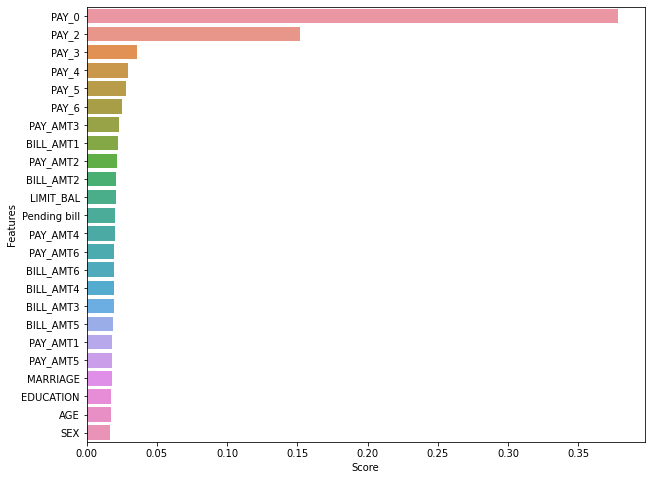

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=features['Score'],y=features['Features'])

According to the above graph, The **PAY_0**(Payment record of April)is the most important feature as it has the highest feature importance score.


In [ ]:
gb_grid.best_params_


{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 100}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_boost_with_best_perams= GradientBoostingClassifier(max_depth= 8,
 min_samples_leaf= 40,
 min_samples_split = 100,
 n_estimators = 100)
gb_boost_with_best_perams.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(gb_boost_with_best_perams,x_train)
shap_value = explainer(x_train)

100%|===================| 22439/22500 [02:10<00:00]       

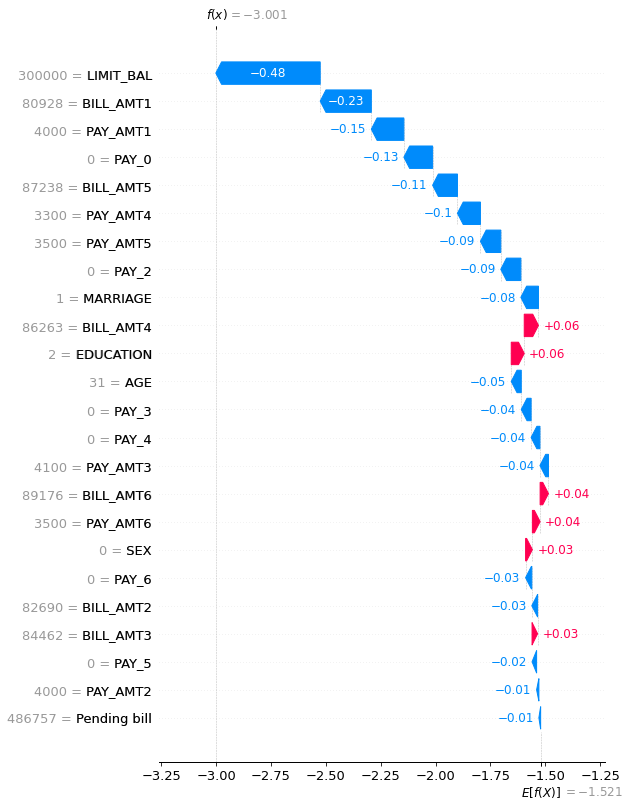

In [ ]:
shap.plots.waterfall(shap_value[0],max_display=50)

The bottom of a waterfall plot starts as the expected value of the model output, and then each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.


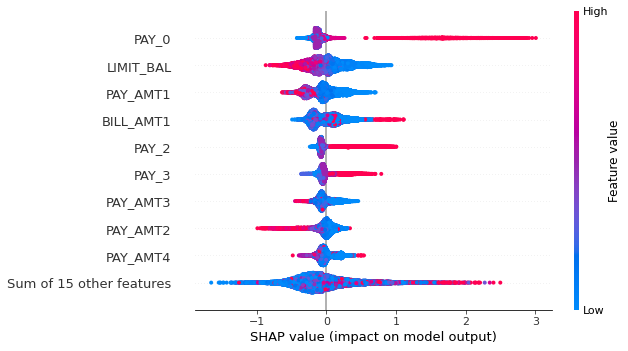

In [ ]:
shap.plots.beeswarm(shap_value)

According to the above graph, the **PAY_0**(Payment record of April)is one of the most important feature as it has the highest shap value.


In [ ]:
shap.initjs()
shap.plots.force(shap_value[0])

Features pushing the prediction higher are in **red** like **Education** & **BILL_AMT6**.

Features which are in **blue** are lowering the prediction like **LIMIT_BAL** & **PAY_AMT4**.


## **Conclusions**


*   The dataset contains a very few amount of observations or data for the **default** credit card payment.
*   Users who had an **University** level education were more in the numbers as compare to the other educational groups.
* Users who studied the higher **University** education defaulted the most.
* The **Female** users tend to be more default as compared to the other gender group.
*The accuracy of the **Logistic Regression** model on both the Train & Test dataset was **0.78** which was very less.
* The **Support Vector Machine** was proved to be very simple and couldn't learn the dataset properly as it's accuracy was only **58**% which was very low.
*Whereas in case of **Gradient Boost classifier** & **XGBoost** Model the accuracy was high i.e. **82%** which proved to be useful.
*Repayment in the month of september i.e **PAY_0** tended to be the most important feature for our machine learning model.

